# Adatvizualizáció

- Mi az adatvizualizáció szerepe?
- Mire van szükség vizualizáció készítéséhez?
- Mit lehet vizualizálni?

## Szükséges könyvtárak dokumentációja

- Pandas - https://pandas.pydata.org/docs/user_guide/index.html - adathalmazzal való munkát segíti 
- NumPy - https://numpy.org/doc/stable/user/basics.html - többdimenziós tömbök és numerikus feladatok kezelését végző könyvtár 
- Matplotlib - https://matplotlib.org/stable/plot_types/index.html - fejlett vizualizációs könyvtár 
- Seaborn - https://seaborn.pydata.org/examples/index.html - vizualizációs könyvtár 
- Plotly - https://plotly.com/python/ - interaktív vizualizációk létrehozását segítő könyvtár 

## Szükséges könyvtárak telepítése és importálása

Könyvtárakat telepíteni csak egyszer szükséges. Ehhez futtatás előtt a "#"-et el kell távolítani. Telepítés után "#" visszaállítható, így nem fogja minden futtatás előtt a könyvtárakat ellenőrizni.

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install plotly
# %pip install numpy
# %pip install nbformat

### Könyvtárak importálása

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import plotly.express as px
from IPython.display import Image

## 1. Bevezetés

Egyszerű függvény ábrázolása Matplotlib segítségével.
A <code>np.linspace</code> parancs megadott intervallumon egymástól egyenlő távolságra elhelyezkedő értékeket hoz létre.

In [3]:
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

### Ábra létrehozása

<code>plt.subplot</code> létrehozza az ábrát, de jelenleg még nem igazán látványos.

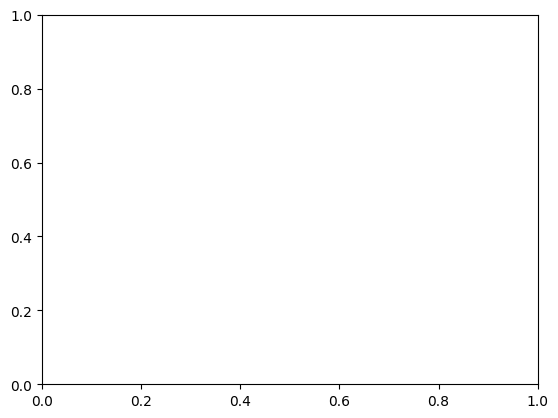

In [4]:
fig, ax = plt.subplots()

### Értékek hozzáadása az ábrához

Az egyszerű vonaldiagramhoz számos tulajdonság tartozik, ami megkönnyíti a diagram beállítását: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

<code>color</code> vagy <code>c</code> - szín

<code>linestyle</code> vagy <code>ls</code> - {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}

<code>linewidth</code> vagy <code>lw</code> - float

<code>label</code> - objektum

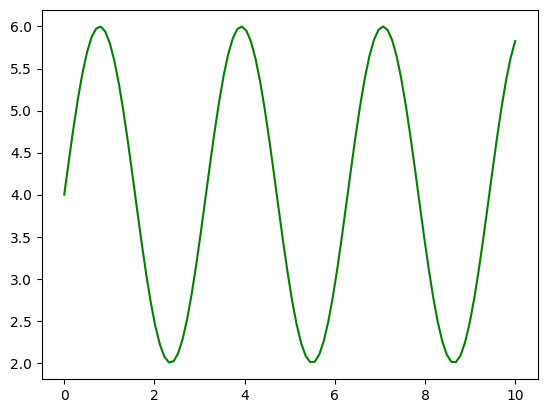

In [5]:
ax.plot(x, y, color="green")

display(fig)

### Részletek hozzáadása

Tengelyek elnevezése és cím megadása

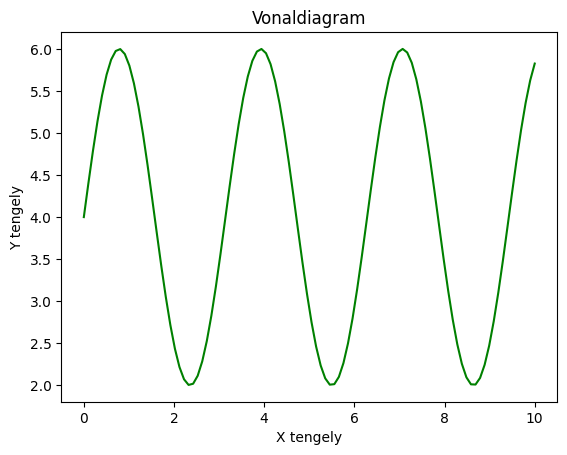

In [6]:
ax.set_xlabel("X tengely")
ax.set_ylabel("Y tengely")
ax.set_title("Vonaldiagram")

display(fig)

## Pont XY diagram

- Bővítsük a diagramot a következő tulajdonságokkal:
s=sizes, c=colors, vmin=0, vmax=100

- Mit csinál az xlim/ylim és xticks/yticks?

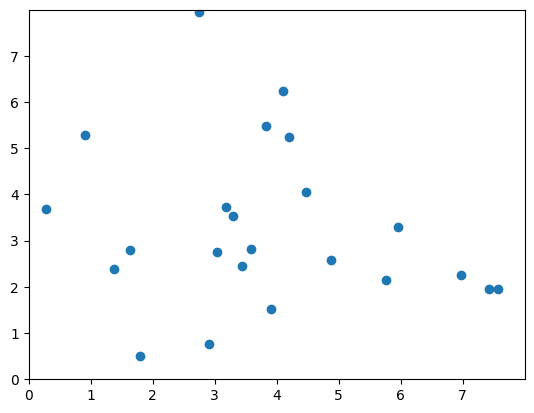

In [7]:
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, 24)

fig, ax = plt.subplots()

ax.scatter(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(0, 8), ylim=(0, 8), yticks=np.arange(0, 8))

plt.show()

## Idővonal

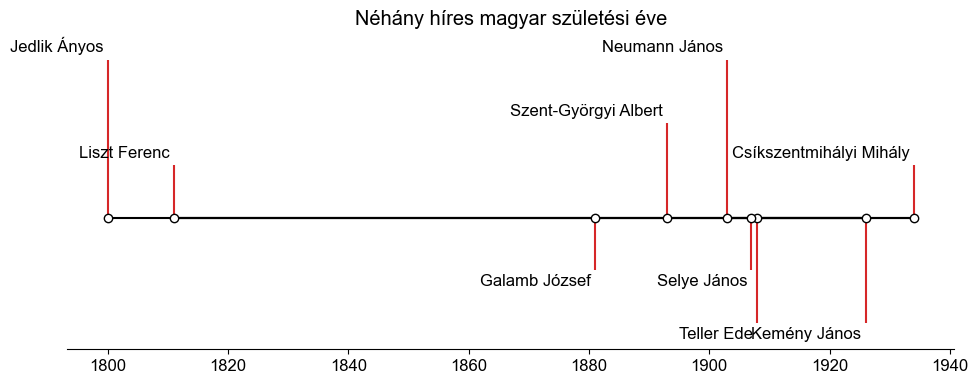

In [8]:
import matplotlib

name = [
    "Neumann János",
    "Teller Ede",
    "Csíkszentmihályi Mihály",
    "Selye János",
    "Liszt Ferenc",
    "Galamb József",
    "Kemény János",
    "Szent-Györgyi Albert",
    "Jedlik Ányos",
]
szuletett = [1903, 1908, 1934, 1907, 1811, 1881, 1926, 1893, 1800]
elhunyt = [1957, 2003, 2021, 1982, 1886, 1955, 1992, 1986, 1895]

font = {"family": "Arial", "weight": "normal", "size": 12}

matplotlib.rc("font", **font)

levels = np.tile([3, -2, 1, -1, 1, -1, -2, 1.8, 3], int(np.ceil(len(szuletett) / 6)))[
    : len(szuletett)
]


fig, ax = plt.subplots(figsize=(10, 4))
ax.set(title="Néhány híres magyar születési éve")

ax.vlines(szuletett, 0, levels, color="tab:red")

ax.plot(szuletett, np.zeros_like(szuletett), "-o", color="k", markerfacecolor="w")


for d, l, event in zip(szuletett, levels, name):
    ax.annotate(
        event,
        xy=(d, l),
        xytext=(-3, np.sign(l) * 3),
        textcoords="offset points",
        horizontalalignment="right",
        verticalalignment="bottom" if l > 0 else "top",
    )

plt.setp(ax.get_xticklabels(), ha="center")

ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.tight_layout()
plt.show()

## 2. Adatok beolvasása fájlból

Leggyakrabban .csv, vagy .xlsx fájlok használatosak.

<code>delimiter</code> - megadja, hogy milyen karakterrel vannak elválasztva az adatok

<code>header</code> - megadható a fejléc sora

<code>index_col</code> - melyik oszlopot használhatja indexként az adathalmazon belül

In [9]:
df = pd.read_csv("countries.csv")

Első néhány sor kiíratása

In [10]:
print(df.head())

  countryCode           countryName currencyCode  population  \
0          AD               Andorra          EUR       77006   
1          AE  United Arab Emirates          AED     9630959   
2          AF           Afghanistan          AFN    37172386   
3          AG   Antigua and Barbuda          XCD       96286   
4          AI              Anguilla          XCD       13254   

            capital continent  areaInSqKm  
0  Andorra la Vella        EU       468.0  
1         Abu Dhabi        AS     82880.0  
2             Kabul        AS    647500.0  
3         St John's       NaN       443.0  
4        The Valley       NaN       102.0  


In [11]:
df.describe()

,population,areaInSqKm
count,2.500000e+02,2.500000e+02
mean,3.045990e+07,5.996369e+05
std,1.286485e+08,1.911821e+06
min,0.000000e+00,0.000000e+00
25%,1.965225e+05,1.174750e+03
50%,4.742677e+06,6.489450e+04
75%,1.809831e+07,3.726315e+05
max,1.411779e+09,1.710000e+07


In [12]:
df.count()

countryCode     249
countryName     250
currencyCode    249
population      250
capital         241
continent       209
areaInSqKm      250
dtype: int64

### Adatok megjelenítése

Plotly megjelenítése Jupyter Book-ban as interaktív felület miatt esetenként nem tölt be. Az ábrák stabil megjelenítése érdekében képként mentjük és azt nyitjuk megazokat.
Jupyter jegyzetben megjelenítésre több lehetőség van:
- ábrát tartalmazó változó nevével pl.: <code>fig</code>
- <code>show</code> metódussal <code>fig.show()</code>
- <code>display</code> paranccsal <code>display(fig)</code>

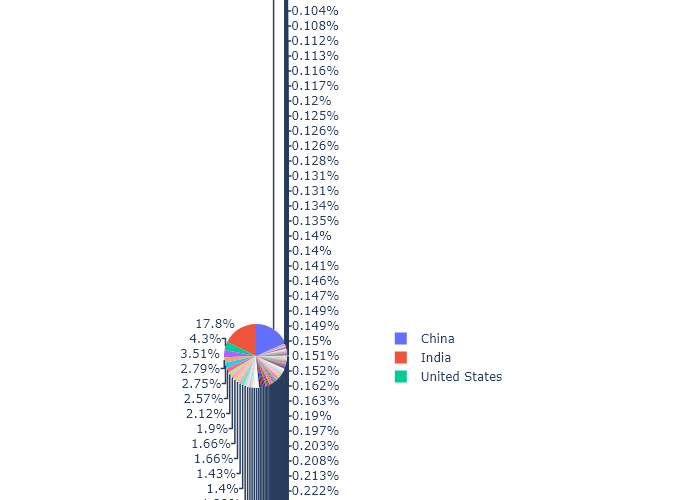

In [13]:
fig = px.pie(df, values="population", names="countryName")

#fig

fig.write_image("pie_1.png")
Image(filename="pie_1.png")

A diagram ebben a formában még nem tökéletes. Próbáljunk meg adatokat szűrni.

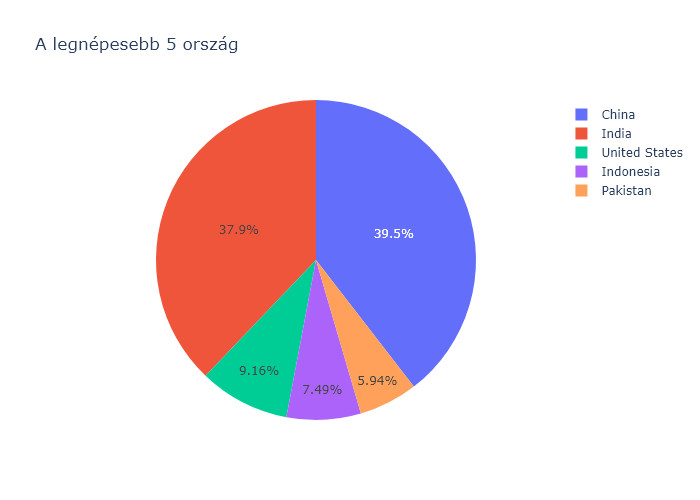

In [14]:
top5 = df.sort_values(by="population", ascending=False).head(5)

fig = px.pie(
    top5, values="population", names="countryName", title="A legnépesebb 5 ország"
)

#fig
fig.write_image("pie_2.png")
Image(filename="pie_2.png")

A diagram Plotly esetén is magas szinten testreszabható. Pl.: a szöveg mérete beállítható <code>fig.update_traces(textfont_size = érték)</code> vonalvastagság <code>fig.update_traces(marker = dict(line = dict(color = "szín", width = érték)))</code> paranccsal.

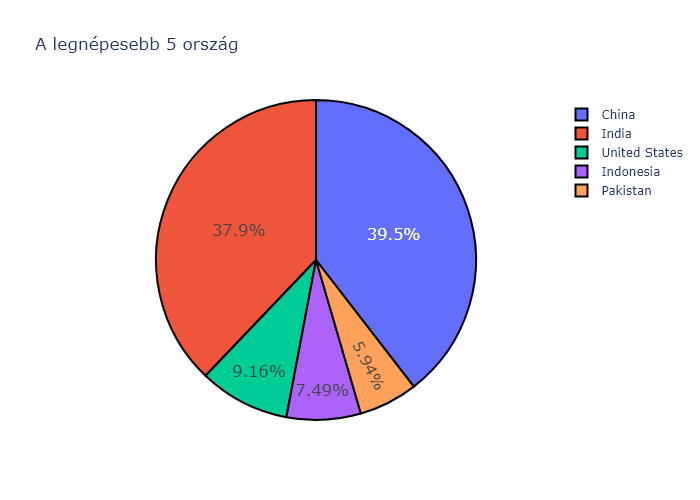

In [15]:
fig.update_traces(textfont_size=16)
fig.update_traces(marker=dict(line=dict(color="black", width=2)))

#fig
fig.write_image("pie_3.png")
Image(filename="pie_3.png")

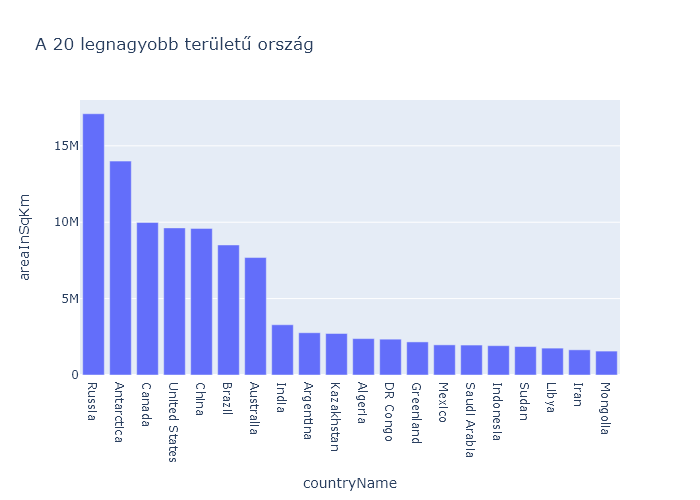

In [16]:
top20 = df.sort_values(by="areaInSqKm", ascending=False).head(20)

fig = px.bar(
    top20, x="countryName", y="areaInSqKm", title="A 20 legnagyobb területű ország"
)

#fig.show()
fig.write_image("column_1.png")
Image(filename="column_1.png")

## Fadiagram

Gyűjtsük ki kontinensenként az 5 legnagyobb területű országot és ábrázoljuk fadiagrammal.

In [17]:
continents = df["continent"].unique()
print(continents)

['EU' 'AS' nan 'AF' 'AN' 'SA' 'OC']


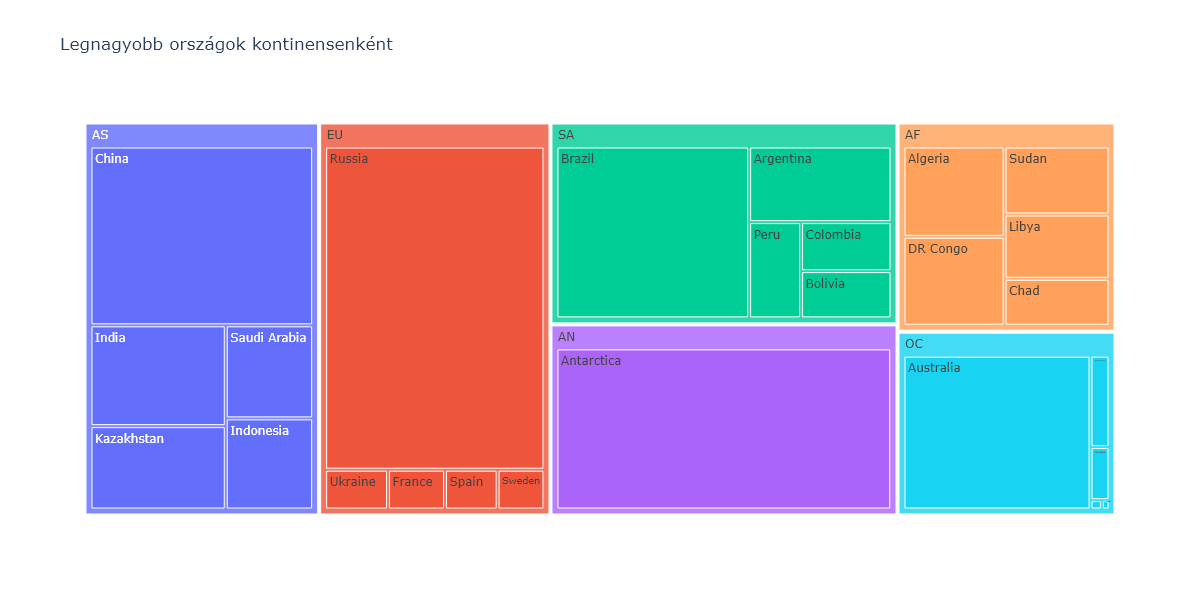

In [18]:
df_temp = []

for continent in continents:
    continentValues = (
        df[df["continent"] == continent]
        .sort_values(by="areaInSqKm", ascending=False)
        .head(5)
    )
    df_temp.append(continentValues)

df_sorted = pd.concat(df_temp)
fig = px.treemap(
    df_sorted,
    path=["continent", "countryName"],
    values="areaInSqKm",
    title="Legnagyobb országok kontinensenként",
    width=1200,
    height=600,
)

#fig.show()
fig.write_image("tree_1.png")
Image(filename="tree_1.png")

## Feladat 

Egy nap 24 órából áll. Készítsetek kördiagramot a napi rutinotokról.

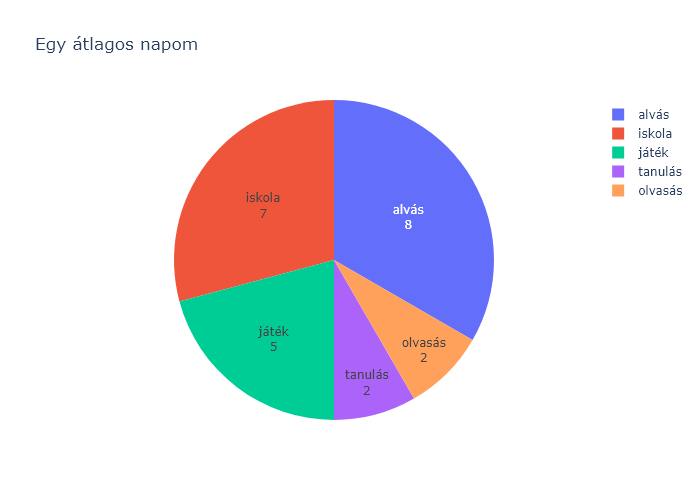

In [19]:
day = {
    "activity_name": ["alvás", "tanulás", "játék", "olvasás", "iskola"],
    "activity_duration": [8, 2, 5, 2, 7],
}

fig = px.pie(
    day, names="activity_name", values="activity_duration", title="Egy átlagos napom"
)

fig.update_traces(textposition="inside", textinfo="label+value")

#fig.show()
fig.write_image("pie_4.png")
Image(filename="pie_4.png")

## 3. Spotify adathalmaz

Az adathalmaz beolvasásnál hibát fog jelezni, értelmezhetetlen karakterre hivatkozva. Ilyen esetben több lehetőség is van: <code>encoding</code> (jelen esetben <b>"latin-1"</b>) meghatározza a konkrét karakterkódolást.

In [20]:
df = pd.read_csv(
    "spotify_popular_songs.csv", delimiter=",", header=0, encoding="latin-1"
)

## Feladat 

Nyerjünk ki információt az adathalmazból! 

- Melyik előadók szereplenk a listán legtöbbször? 

- Ki a top10? 

- Hányszor voltak lejátszva a legnépszerűbb számok?

In [21]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,"Seven (feat. Latto) (Explicit Ver.),""Latto, Ju...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LALA,Myke Towers,1.0,2023.0,3.0,23.0,1474.0,48.0,133716286.0,48.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,1.0,2023.0,6.0,30.0,1397.0,113.0,140003974.0,94.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,1.0,2019.0,8.0,23.0,7858.0,100.0,800840817.0,116.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,1.0,2023.0,5.0,18.0,3133.0,50.0,303236322.0,84.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0


Adott oszlopra kért <code>value_counts</code> egy <code>series</code> típusú adatstruktúrát hoz létre, ami rendelkezik <code>.index</code> és <code>.value</code> tagokkal.

## 4. IMDB adathalmaz

In [22]:
df = pd.read_csv("imdb_top_movies.csv", delimiter=",", header=0, encoding="latin-1")

print(df.head(10))

                           Movie Name Release Year  Duration  IMDB Rating  \
0                       The Godfather         1972       175          9.2   
1               The Godfather Part II         1974       202          9.0   
2                     Ordinary People         1980       124          7.7   
3                  Lawrence of Arabia         1962       218          8.3   
4                          Straw Dogs         1971       113          7.4   
5  Close Encounters of the Third Kind         1977       138          7.6   
6        Once Upon a Time in the West         1968       166          8.5   
7                     The Dirty Dozen         1967       150          7.7   
8                     Rosemary's Baby         1968       137          8.0   
9                             Cabaret         1972       124          7.8   

   Metascore      Votes                        Genre              Director  \
0      100.0  2,002,655                 Crime, Drama  Francis Ford Coppola

### Feladat

Mik a kedvenc műfajod legjobban értékelt filmjei?